In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
house_size = np.array([50, 1200,1574,1800,2000])
Apartment_names = ["Small-Town","Cyberzon","Zenith","My Home","CyberCommune"]
prices_inLakhs = np.array([100000, 5500000,7100000,8500000,10000000])
dict1 = {"House Size":house_size,
        "Apartment Names": Apartment_names,
        "Price":prices_inLakhs}
dict1

{'House Size': array([  50, 1200, 1574, 1800, 2000]),
 'Apartment Names': ['Small-Town',
  'Cyberzon',
  'Zenith',
  'My Home',
  'CyberCommune'],
 'Price': array([  100000,  5500000,  7100000,  8500000, 10000000])}

In [3]:
datasheet = pd.DataFrame(dict1)
datasheet

,House Size,Apartment Names,Price
0,50,Small-Town,100000
1,1200,Cyberzon,5500000
2,1574,Zenith,7100000
3,1800,My Home,8500000
4,2000,CyberCommune,10000000


In [4]:
datasheet.to_csv("Housing Details.csv")

In [5]:
datasheet.insert(2,"Locality",["Gachibowli","Hitech City","Madhapur","Jubilee Hills","LB Nagar"])

In [6]:
datasheet

,House Size,Apartment Names,Locality,Price
0,50,Small-Town,Gachibowli,100000
1,1200,Cyberzon,Hitech City,5500000
2,1574,Zenith,Madhapur,7100000
3,1800,My Home,Jubilee Hills,8500000
4,2000,CyberCommune,LB Nagar,10000000


In [7]:
datasheet["Price"]

0      100000
1     5500000
2     7100000
3     8500000
4    10000000
Name: Price, dtype: int32

In [8]:
#datasheet.insert(4,"Pricing level",["Good","Good","Good","Good"])
#datasheet

In [9]:
datasheet["Pricing Level"] = np.where(datasheet["Price"]>8400000,"Pricing is too High","Optimum Pricing")

In [10]:
datasheet

,House Size,Apartment Names,Locality,Price,Pricing Level
0,50,Small-Town,Gachibowli,100000,Optimum Pricing
1,1200,Cyberzon,Hitech City,5500000,Optimum Pricing
2,1574,Zenith,Madhapur,7100000,Optimum Pricing
3,1800,My Home,Jubilee Hills,8500000,Pricing is too High
4,2000,CyberCommune,LB Nagar,10000000,Pricing is too High


Text(0, 0.5, 'Price in Lakhs')

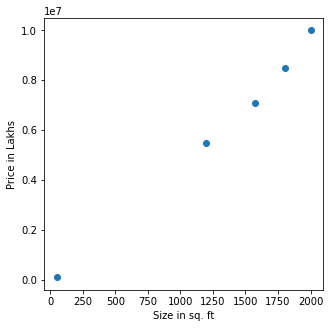

In [11]:
plt.figure(figsize = (5,5))
plt.scatter(datasheet["House Size"],datasheet["Price"])
plt.xlabel("Size in sq. ft")
plt.ylabel("Price in Lakhs")

In [12]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(datasheet[["House Size"]],datasheet["Price"])

LinearRegression()

In [13]:
reg.predict([[2300]])

array([11044076.11018625])

In [14]:
reg.coef_

array([4926.2470367])

In [15]:
reg.intercept_

-286292.0742152827

In [16]:
datasheet["House Size"].skew()

-1.4874074743791024

In [25]:
max_val = datasheet["House Size"].quantile(0.95)
max_val

1960.0

In [26]:
min_val = datasheet["House Size"].quantile(0.05)
min_val

280.0

In [28]:
datasheet[datasheet["House Size"]>max_val]

,House Size,Apartment Names,Locality,Price,Pricing Level
4,2000,CyberCommune,LB Nagar,10000000,Pricing is too High


In [29]:
datasheet[datasheet["House Size"]<min_val]

,House Size,Apartment Names,Locality,Price,Pricing Level
0,50,Small-Town,Gachibowli,100000,Optimum Pricing


In [33]:
New_Data = datasheet[(datasheet["House Size"] < max_val) & (datasheet["House Size"] > min_val)]

In [34]:
New_Data

,House Size,Apartment Names,Locality,Price,Pricing Level
1,1200,Cyberzon,Hitech City,5500000,Optimum Pricing
2,1574,Zenith,Madhapur,7100000,Optimum Pricing
3,1800,My Home,Jubilee Hills,8500000,Pricing is too High
